###  아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

==> 인터넷 옷 쇼핑몰로 가정하고 실습 과제 수행

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
######################### 고객 속성 데이터 생성을 위한 random Field 생성
CustID=np.arange(10001, 11001)                                                                                         ## 고객 ID
Gender=np.random.choice(2, size=1000)                                                                                   ## 고객 Gender Female: 0, Male: 1 # gender=np.random.randint(2, size=1000) 동일
Age=np.random.randint(10,101, size=1000)                                                                                ## 고객 나이 10~100세
Region=np.random.randint(1,11, size=1000)                                                                               ## 구매 고객 지역: 1~10 지역

######################### 고객 속성 DATAFRAME 생성
DF_Customers=pd.DataFrame(np.column_stack([CustID, Gender, Age, Region]), columns=['CustID', 'Gender', 'Age', 'Region'])


#########################  상품 ID 및 가격 정보 DB 생성
## Product ID 생성 (1~30)
ProdID = np.arange(10, 40)

# 상품 코드에 따른 가격 생성 (최소 단위 100원)
Price=[]
## 저가 상품 (1000~16300), 중가 상품 (16300~32600), 가 상품 (32600~50000) 생성
Price.extend(np.random.randint(337, 501, size=10)*100)
Price.extend(np.random.randint(174, 337, size=10)*100)
Price.extend(np.random.randint(10, 174, size=10)*100)

# 생성된 가격을 이용하여 DF_Prods 데이터프레임 생성
DF_Prods = pd.DataFrame({'ProdID': ProdID, 'Price': Price})

#########################  거래 데이터 생성을 위한 Random Field 생성
OrderID=np.arange(1, 10001)
CustID=np.random.randint(10001, 11001, size=10000)                                                                      ## 주문 ID
OrderDate=np.random.choice(pd.date_range(start='2020-01-01',end='2021-12-31', freq='D', normalize=True), size=10000)    ## 주문 시간
OrderDW=pd.to_datetime(OrderDate).day_name()                                                                            ## 주문 시간: 요일
ProdID=np.random.randint(10,40, size=10000)                                                                              ## 주문 상품 ID
Quantity=np.random.randint(1,101, size=10000)                                                                           ## 상품 주문 갯수
OrderTime = np.random.randint(1, 25, size=10000)                                                                        ## 주문 시간
# 주문 시간을 OrderDate 배열에 반영
OrderDate = [date + pd.Timedelta(hours=time) for date, time in zip(OrderDate, OrderTime)]


DF_Orders = pd.DataFrame({
    'OrderID': OrderID, 'CustID': CustID, 'OrderDate': OrderDate,'OrderDW': OrderDW,
    'ProdID': ProdID, 'Quantity': Quantity, 'OrderTime': OrderTime
})

#########################  고객 정보를 담은 1000 entries의 DF_Customers 와 주문 정보를 담은 10000 entries의 DF_Orders 통합 데이터 프레임 생성
# DF_Customers와 DF_Orders를 CustID 열을 기준으로 Merge ==> 고객/주문 정보 통합 DataFrame
MergedDF = pd.merge(DF_Orders, DF_Customers, on='CustID', how='left')

# IntegOrders에 ProdID에 해당하는 가격을 DF_Prods에서 가져와서 Price 컬럼 생성
IntegOrders = MergedDF.merge(DF_Prods, on='ProdID', how='left')

# OrderAmount 계산하여 OrderAmount 컬럼 추가
IntegOrders['OrderAmount'] = IntegOrders['Price'] * IntegOrders['Quantity']

IntegOrders.head()

,OrderID,CustID,OrderDate,OrderDW,ProdID,Quantity,OrderTime,Gender,Age,Region,Price,OrderAmount
0,1,10679,2020-05-30 21:00:00,Saturday,26,31,21,1,98,3,32900,1019900
1,2,10269,2020-10-11 21:00:00,Sunday,14,52,21,1,77,4,35700,1856400
2,3,10577,2020-12-10 08:00:00,Thursday,19,79,8,1,54,8,48800,3855200
3,4,10895,2021-06-01 00:00:00,Monday,35,34,24,0,13,4,3300,112200
4,5,10765,2021-08-19 15:00:00,Thursday,11,11,15,1,25,9,43500,478500


In [ ]:
print(IntegOrders.info())
print(IntegOrders.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      10000 non-null  int64         
 1   CustID       10000 non-null  int64         
 2   OrderDate    10000 non-null  datetime64[ns]
 3   OrderDW      10000 non-null  object        
 4   ProdID       10000 non-null  int64         
 5   Quantity     10000 non-null  int64         
 6   OrderTime    10000 non-null  int64         
 7   Gender       10000 non-null  int64         
 8   Age          10000 non-null  int64         
 9   Region       10000 non-null  int64         
 10  Price        10000 non-null  int64         
 11  OrderAmount  10000 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 937.6+ KB
None
           OrderID        CustID                   OrderDate        ProdID  \
count  10000.00000  10000.000000                   

#### Data Review
  - 우선 가동된 data라 결측치나 후처리가 필요한 data는 없음



#### Data 분석

  (1) Gender<br>
    - 성별에 따른 구매력 및 선호 상품 금액대를 비교 <br>
        * 난수로 생성된 data라 실재 data에서 보여야할 skew가 전혀 반영이 안됨 <br>
        * 수정 사항 1: 대동 소이한 남/여에 따른 구매력 수정 필요 남성 대비 여성의 구매력 증가<br>
        * 수정 사항 2: 남/여에 따라 선호하는 상품 금액대 조정

In [ ]:
# 1-1: 남/여에 따른 구매력 (구매 횟수) 비교
OrderFreq_Gender = IntegOrders.groupby('Gender')['OrderID'].count()

# 1-2: 남/여에 따른 구매력 (평균 구매액) 비교
AvgAmount_Gender = IntegOrders.groupby('Gender')['OrderAmount'].mean()


# 1-3: 남/여에 따른 선호 상품 가격대
# 구매 상품의 가격대 분류
def Price_Categ(price):
  if price <= 17300: return 'Low-Price'
  elif price <= 33600:    return 'Medium-Price'
  else: return 'High-Price'

IntegOrders['PriceCategory'] = IntegOrders['Price'].apply(Price_Categ)
PriceDistrib_Gender = IntegOrders.groupby(['Gender', 'PriceCategory']).size()
PriceDistrib_Gender = PriceDistrib_Gender.unstack()

# Plot 비교
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
OrderFreq_Gender.plot(kind='bar', color='bisque')
plt.title('Order-Frequency vs. Gender')
plt.ylabel('Order-Frequency')

plt.subplot(1, 3, 2)
AvgAmount_Gender.plot(kind='bar', color='lightgrey')
plt.title('Average-Amount vs. Gender')
plt.ylabel('Average-Amount')

plt.subplot(1, 3, 3)
PriceDistrib_Gender.loc[0].plot(kind='bar', color='r', width=0.4, position=0, label='Female')
PriceDistrib_Gender.loc[1].plot(kind='bar', color='b', width=0.4, position=1, label='Male')
plt.title('Female vs Male Price Distribution')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout(); plt.show()


NameError: name 'IntegOrders' is not defined

  (2) Age<br>
    - 연령에 따른 구매력 및 선호 상품 금액대를 비교 <br>
        * 전 연령대에서 구매력 (빈도/총주문액)이 비슷하게 나온 문제 <br>
        * 수정 사항 3: 연령대에 따른 구매력 차이 ex) 10대/60대이상 구매력을 낮추고, 30대, 20대, 40대 순으로 수정<br>
        * 수정 사항 4: 연령대에 따라 선호하는 상품 금액대 조정 <br>
          10대/60대 이상 저가 상품, 20/20대 중가 선호, 40대 고가품 선호로 수정<br>
    - 구매하는 연령대 역시 주 고객층의 연령대가 있는 Un-uniform한 특성을 보여야 함 <br>
        * 수정 사항 5: 주 고객층을 20대 후반에서 30대 중반의 여성으로 변경

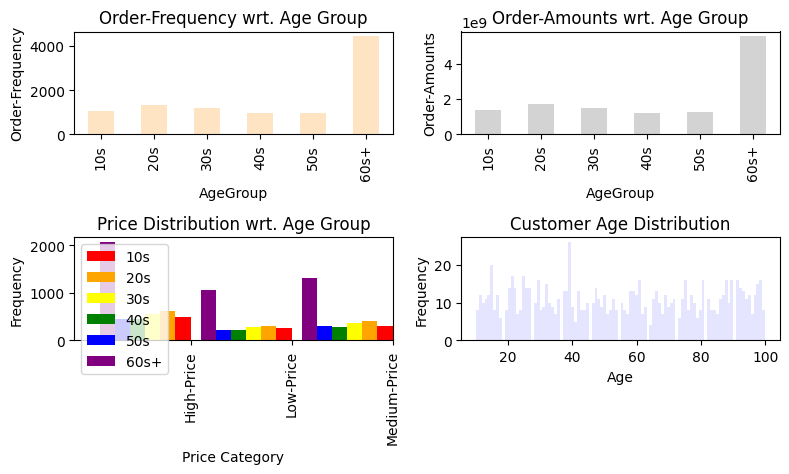

In [ ]:
# Age 그룹
bins = [10, 20, 30, 40, 50, 60, np.inf]
labels = ['10s', '20s', '30s', '40s', '50s', '60s+']
IntegOrders['AgeGroup'] = pd.cut(IntegOrders['Age'], bins=bins, labels=labels)

# 2-1: 연령대에 따른 구매력 (구매 횟수) 비교
OrderFreq_Age = IntegOrders.groupby('AgeGroup')['OrderID'].count()

# 2-2: 연령대에 따른 구매력 (평균 주문 금액) 비교
OrderAmount_Age = IntegOrders.groupby('AgeGroup')['OrderAmount'].sum()

# 2-3: 연령대에 따른 선호 상품 가격대
# 구매 상품의 가격대 분류
PriceDistrib_Age = IntegOrders.groupby(['AgeGroup', 'PriceCategory']).size()
PriceDistrib_Age = PriceDistrib_Age.unstack()

# Plot 비교
plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 1)
OrderFreq_Age.plot(kind='bar', color='bisque')
plt.title('Order-Frequency wrt. Age Group')
plt.ylabel('Order-Frequency')

plt.subplot(2, 2, 2)
OrderAmount_Age.plot(kind='bar', color='lightgrey')
plt.title('Order-Amounts wrt. Age Group')
plt.ylabel('Order-Amounts')

plt.subplot(2, 2, 3)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for i, age_group in enumerate(labels):
    PriceDistrib_Age.loc[age_group].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=age_group)
plt.title('Price Distribution wrt. Age Group')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
IntegOrders.groupby('CustID')['Age'].first().plot.hist(alpha=0.1, bins=100, color='blue')
plt.title('Customer Age Distribution')
plt.xlabel("Age")
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()



#### ==> 아래 plot 결과로부터 60세 이상의 연령대가 구매력이 높은 것 처럼 보이지만.. 난수 발생시 어느정도 uniform하게 연령대가 붙포할 텐데.
#### 60대 이상을 1-그룹으로 묶어서 비교하면서 표본수가 다른 연령대 대비 상대적으로 많아져서 보이는 현상
#### 평균 구매액  평균 구매 횟수로 재 탐색


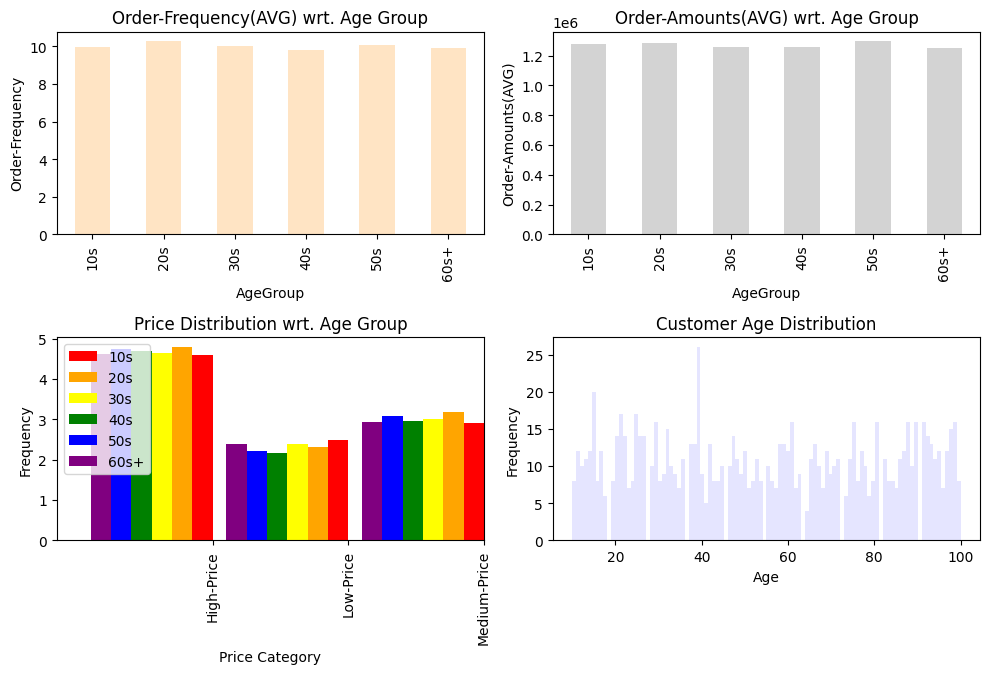

In [ ]:
# Age  연령 대별로 그룹핑
bins = [10, 20, 30, 40, 50, 60, np.inf]
labels = ['10s', '20s', '30s', '40s', '50s', '60s+']
IntegOrders['AgeGroup'] = pd.cut(IntegOrders['Age'], bins=bins, labels=labels)

# 각 나이 그룹별 총 인원수 계산
AgeGroupCounts = IntegOrders.groupby('AgeGroup')['CustID'].nunique()
# 2-1: 연령대에 따른 구매력 (구매 횟수) 비교
# 모든 연령대가 고루 생성되어 60대 이상이 가장 많은 표본을 차지
# 각 나이 그룹별 주문 횟수를 해당 연령 그룹의 총 인원 수로 나눈 평균 주문 횟수
OrderFreq_Age = IntegOrders.groupby('AgeGroup')['OrderID'].count() / AgeGroupCounts

# 2-2: 연령대에 따른 구매력 (평균 주문 금액) 비교
AvgAmount_Age = IntegOrders.groupby('AgeGroup')['OrderAmount'].mean()

# 2-3: 연령대에 따른 선호 상품 가격대
# 구매 상품의 가격대 분류
PriceDistrib_Age = IntegOrders.groupby(['AgeGroup', 'PriceCategory']).size()/ AgeGroupCounts
PriceDistrib_Age = PriceDistrib_Age.unstack()

# Plot 비교
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
OrderFreq_Age.plot(kind='bar', color='bisque')
plt.title('Order-Frequency(AVG) wrt. Age Group')
plt.ylabel('Order-Frequency')

plt.subplot(2, 2, 2)
AvgAmount_Age.plot(kind='bar', color='lightgrey')
plt.title('Order-Amounts(AVG) wrt. Age Group')
plt.ylabel('Order-Amounts(AVG)')

plt.subplot(2, 2, 3)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for i, age_group in enumerate(labels):
    PriceDistrib_Age.loc[age_group].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=age_group)
plt.title('Price Distribution wrt. Age Group')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
IntegOrders.groupby('CustID')['Age'].first().plot.hist(alpha=0.1, bins=100, color='blue')
plt.title('Customer Age Distribution')
plt.xlabel("Age")
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()



  (3) 지역 <br>
    - 지역에 따른 구매력 비교 <br>
        * 난수로 생성된 data라 실재 data에서 보여야할 skew가 전혀 반영이 안됨 <br>
        * 수정 사항 6: 1~10 에 따라 특정 도시라 가정하고 도시 규모/인구에 구매력 조정 <br>

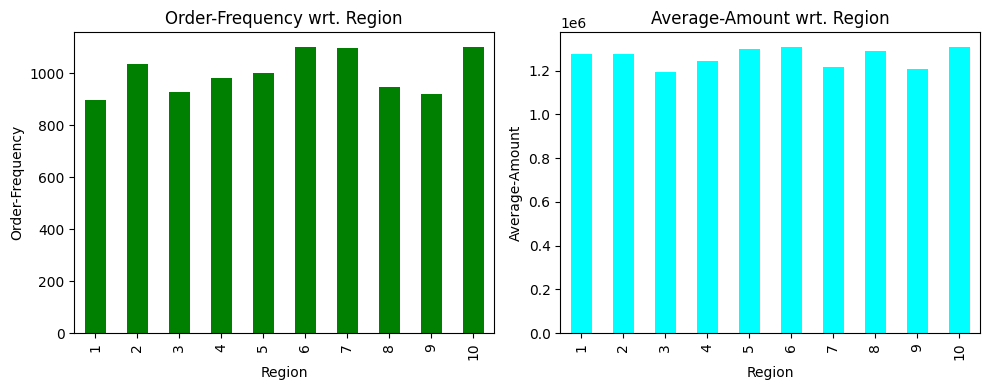

In [ ]:
# 3-1: 지역에 따른 구매력 (구매 횟수) 비교
OrderFreq_Region = IntegOrders.groupby('Region')['OrderID'].count()

# 3-2: 지역에 따른 구매력 (평균 구매액) 비교
AvgAmount_Region = IntegOrders.groupby('Region')['OrderAmount'].mean()

# Plot 비교
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
OrderFreq_Region.plot(kind='bar', color='g')
plt.title('Order-Frequency wrt. Region')
plt.ylabel('Order-Frequency')

plt.subplot(1, 2, 2)
AvgAmount_Region.plot(kind='bar', color='cyan')
plt.title('Average-Amount wrt. Region')
plt.ylabel('Average-Amount')

plt.tight_layout(); plt.show()


  (4) 취급 상품 가격 & 주문 총 구매액 <br>
    - 취급 상품 가격 & 주문 총 구매액의 경우 판매 사이트의 성향에 따라 주력 상품이 있고, 주로 거래하는 가격대들이 존재할 테지만 생성된 DB 는 모든 상품이 균일하게 판매되고, 구매 갯수 분포도 균일 <br>
    - 아래 취급 상품 가격 분포도를 보면 0원 근처와 25000원 근처에서 abnormal한 peak를 보이는데. 이는 DB를 처음 생성할 때 1-30에 해당하는 상품 코드에 대해 난수를 발생 시킨 후에 주문 정보 DB  생성 시 상품 코드 1-30에 대해서 10000개의 난수를 발생시키고, 다시 가격으로 mapping을 했기 때문에 처음 난수 발생 시에 작은 pool에서 난수를 발생 시켜서 발생하는 문제임
    - 가격 분포의 경우 모든 상품 가격대 (저가/중가/고가)에서 상품 개수를 0-100 사이로 주문하게 되는데, 상품 갯수가 작은 그룹들은 모두 아래쪽에서 중첩되게 되어 가격이 낮을 수록 histogram의 빈도수가 증가하는 현상.
        * 수정 사항 7: 상품 가격대 분포 조정 <br>
        * 수정 사항 8: 상품 구매액 분포 조정 <br>

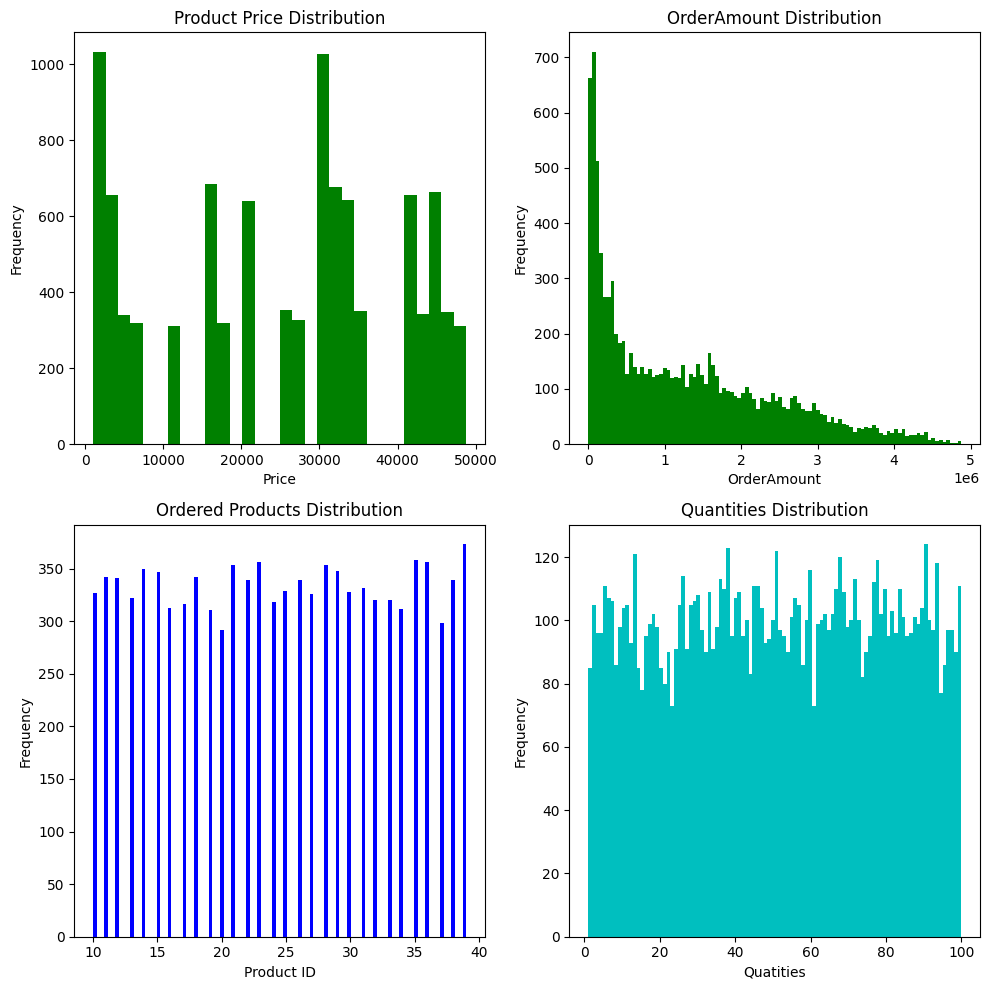

In [ ]:
## 4-1: 주문 list 들로 부터 상품 가격 분포, 주문총액 탐색
## Plot의 2nd-row: 주문 Item 번호 &  주문 수량
# Plot 비교
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
IntegOrders['Price'].plot.hist(alpha=1, bins=30, color='g')
plt.title('Product Price Distribution')
plt.xlabel("Price")
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
IntegOrders['OrderAmount'].plot.hist(alpha=1, bins=100, color='g')
plt.title('OrderAmount Distribution')
plt.xlabel("OrderAmount")
plt.ylabel('Frequency')


plt.subplot(2, 2, 3)
IntegOrders['ProdID'].plot.hist(alpha=1, bins=100, color='b')
plt.title('Ordered Products Distribution')
plt.xlabel("Product ID")
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
IntegOrders['Quantity'].plot.hist(alpha=1, bins=100, color='c')
plt.title('Quantities Distribution')
plt.xlabel("Quatities")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


  (5) 2020년 vs. 2021년 매출 비교 탐색 <br>
    - 2020 vs. 2021년 매출건수 매출액 균일 <br>
        * 수정 사항 9: 2020년 vs. 2021년 매출 조정 (코로나 팬데믹으로 인해 20년 중반기 이후 인터넷 주문량 급증 반영)<br>

2020년 총 매출 건수: 5055
2021년 총 매출 건수: 4945
2020년 총 매출액: 6355055100
2021년 총 매출액: 6276042200
2021년 대비 총 매출 건수 증가: -110
2021년 대비 총 매출액 증가: -79012900


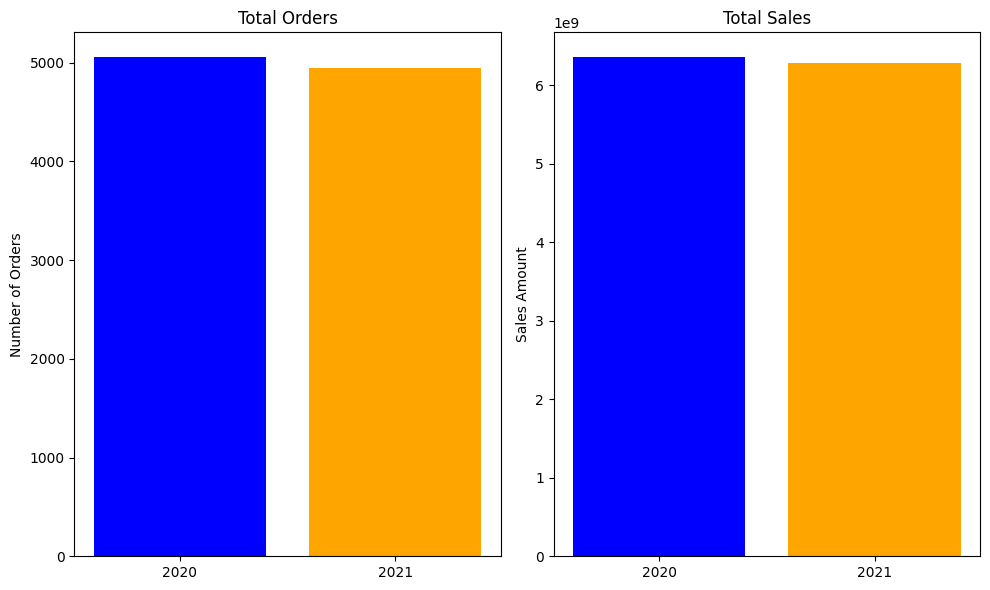

In [ ]:
# 주문 시간에서 연도(Year) 추출
IntegOrders['Year'] = IntegOrders['OrderDate'].dt.year

# 2020년과 2021년의 주문 데이터 분리
orders_2020 = IntegOrders[IntegOrders['Year'] == 2020]
orders_2021 = IntegOrders[IntegOrders['Year'] == 2021]

# 2020년과 2021년 각각의 총 매출 건수와 총 매출액 계산
total_orders_2020 = orders_2020['OrderID'].nunique()
total_orders_2021 = orders_2021['OrderID'].nunique()

total_sales_2020 = orders_2020['OrderAmount'].sum()
total_sales_2021 = orders_2021['OrderAmount'].sum()

# 차이 계산
diff_total_orders = total_orders_2021 - total_orders_2020
diff_total_sales = total_sales_2021 - total_sales_2020

# 결과 출력
print("2020년 총 매출 건수:", total_orders_2020)
print("2021년 총 매출 건수:", total_orders_2021)
print("2020년 총 매출액:", total_sales_2020)
print("2021년 총 매출액:", total_sales_2021)
print("2021년 대비 총 매출 건수 증가:", diff_total_orders)
print("2021년 대비 총 매출액 증가:", diff_total_sales)

# 시각화
years = ['2020', '2021']
total_orders = [total_orders_2020, total_orders_2021]
total_sales = [total_sales_2020, total_sales_2021]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(years, total_orders, color=['blue', 'orange'])
plt.title('Total Orders')
plt.ylabel('Number of Orders')

plt.subplot(1, 2, 2)
plt.bar(years, total_sales, color=['blue', 'orange'])
plt.title('Total Sales')
plt.ylabel('Sales Amount')

plt.tight_layout()
plt.show()


  (6) 계절별 / 주문 시간 대별 주문 빈도와 매출액 탐색 <br>
    - 계절별/주문시간별 매출 분포도 균일 <br>
    (Plot 결과에서 07:00~18:00 시간대에 주문량이 많아 보이는 이유는 단순히 시간 구간이 가장 넓어서임) <br>
        * 수정 사항 10: 여름철 대비 겨울철에 의류 가격이 상대적으로 고가인 제품 주문량이 증가 반영 <br>
        * 수정 사항 11: 시간 구간별 매출을 'PrimeTime' >> 'DayTime' > 'DayBreak' 순으로 수정 반영 <br>

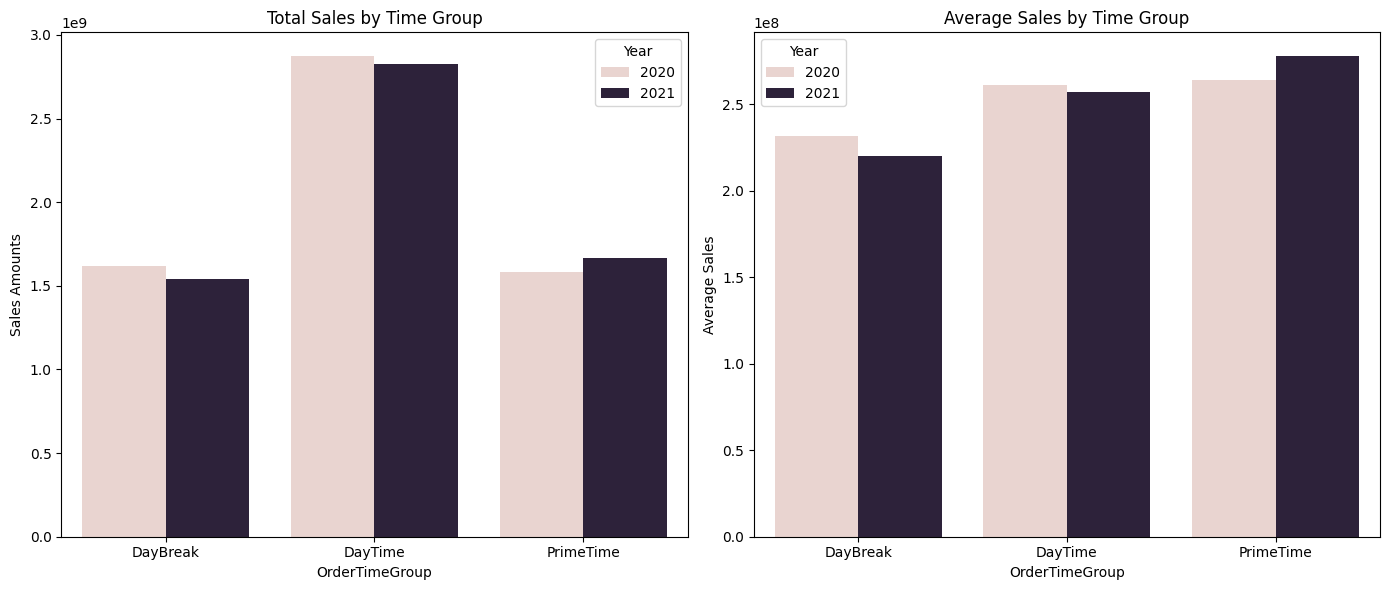

In [ ]:
# 시간 구간 정의
time_bins = [0, 7, 18, 25]

# 주문 시간대에 따라 그룹 나누기
IntegOrders['OrderTimeGroup'] = pd.cut(IntegOrders['OrderTime'], bins=time_bins, labels=['DayBreak', 'DayTime', 'PrimeTime'])

# 2020년과 2021년의 주문 데이터 분리
orders_2020 = IntegOrders[IntegOrders['Year'] == 2020]
orders_2021 = IntegOrders[IntegOrders['Year'] == 2021]

# 시간 구간별 넓이 계산
time_bin_widths = [time_bins[i+1] - time_bins[i] for i in range(len(time_bins) - 1)]

# 시간대별 총 매출 건수와 총 매출액 계산
grouped_orders_2020 = orders_2020.groupby(['OrderTimeGroup', 'Year']).apply(lambda x: pd.Series({
    'OrderCount': x['OrderID'].nunique(),
    'TotalSales': x['OrderAmount'].sum(),
    'AvgSales': x['OrderAmount'].sum() / time_bin_widths[x['OrderTimeGroup'].cat.codes.iloc[0]]
})).reset_index()

grouped_orders_2021 = orders_2021.groupby(['OrderTimeGroup', 'Year']).apply(lambda x: pd.Series({
    'OrderCount': x['OrderID'].nunique(),
    'TotalSales': x['OrderAmount'].sum(),
    'AvgSales': x['OrderAmount'].sum() / time_bin_widths[x['OrderTimeGroup'].cat.codes.iloc[0]]
})).reset_index()

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='OrderTimeGroup', y='TotalSales', hue='Year', data=pd.concat([grouped_orders_2020, grouped_orders_2021]))
plt.title('Total Sales by Time Group')
plt.ylabel('Sales Amounts')

plt.subplot(1, 2, 2)
sns.barplot(x='OrderTimeGroup', y='AvgSales', hue='Year', data=pd.concat([grouped_orders_2020, grouped_orders_2021]))
plt.title('Average Sales by Time Group')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.show()


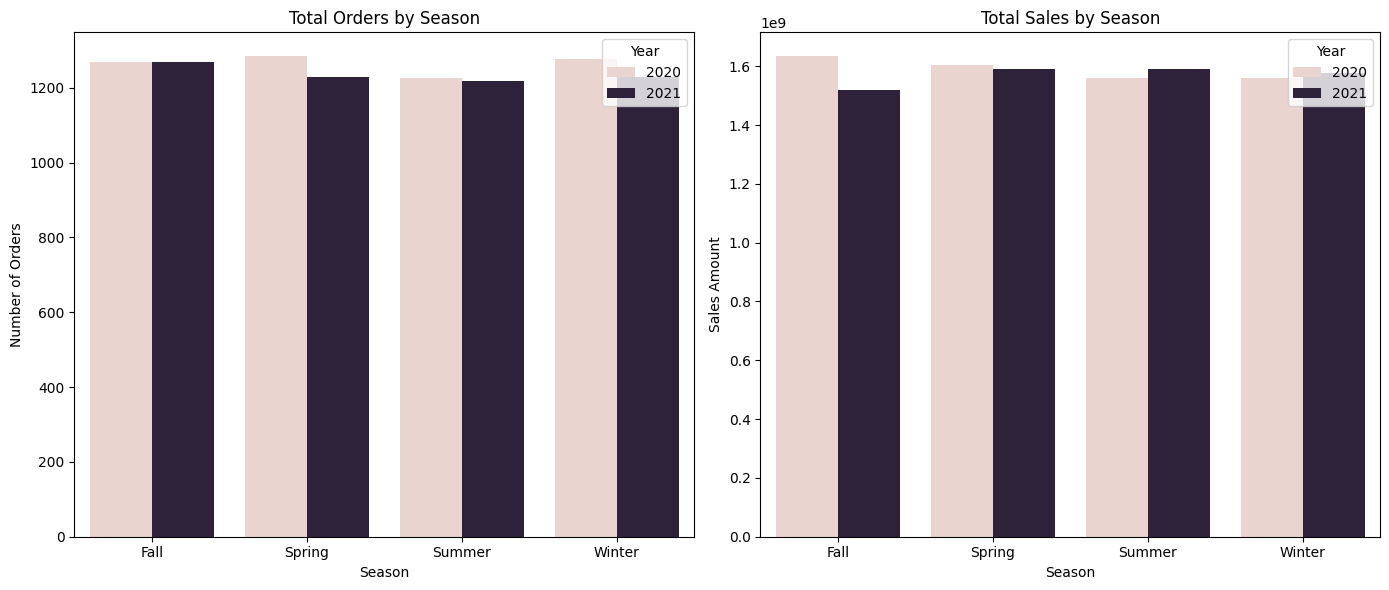

In [ ]:
# 주문 시간대에 따라 계절 나누기
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

IntegOrders['Season'] = IntegOrders['OrderDate'].dt.month.map(get_season)

# 2020년과 2021년의 주문 데이터 분리
orders_2020 = IntegOrders[IntegOrders['Year'] == 2020]
orders_2021 = IntegOrders[IntegOrders['Year'] == 2021]

# 계절별 총 매출 건수와 총 매출액 계산
grouped_orders_2020_season = orders_2020.groupby(['Season', 'Year']).agg({'OrderID': 'nunique', 'OrderAmount': 'sum'}).reset_index()
grouped_orders_2021_season = orders_2021.groupby(['Season', 'Year']).agg({'OrderID': 'nunique', 'OrderAmount': 'sum'}).reset_index()

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Season', y='OrderID', hue='Year', data=pd.concat([grouped_orders_2020_season, grouped_orders_2021_season]))
plt.title('Total Orders by Season')
plt.ylabel('Number of Orders')

plt.subplot(1, 2, 2)
sns.barplot(x='Season', y='OrderAmount', hue='Year', data=pd.concat([grouped_orders_2020_season, grouped_orders_2021_season]))
plt.title('Total Sales by Season')
plt.ylabel('Sales Amount')

plt.tight_layout()
plt.show()


  (7) Correlation <br>
    - 변수들 간, 그리고 각 변수들과 매출액간 상관관계가 전혀 관찰 되지 않음
     <br>
    - OrderAmount=Price * Quantity의 수식으로 반영된 Correlation만 보임 <br>
        * (1) ~ (6) 까지의 탐색결과를 바탕으로 수정 후 Correlation변화 관찰 <br>

In [ ]:
# Correation 및 군집도 plot을 위한 DF copy & String으로 된 Columns Drop
IntegOrders2=IntegOrders.copy()
IntegOrders2.drop(columns=['OrderDW', 'AgeGroup', 'PriceCategory','Year',	'OrderTimeGroup',	'Season'], axis=1, inplace=True)

In [ ]:
CorrMrx=IntegOrders2.corr()
CorrMrx

,OrderID,CustID,OrderDate,ProdID,Quantity,OrderTime,Gender,Age,Region,Price,OrderAmount
OrderID,1.000000,-0.011252,0.001783,0.003832,-0.004665,-0.013832,0.017937,-0.007788,-0.004194,-0.006264,-0.006945
CustID,-0.011252,1.000000,0.005124,0.006837,-0.012275,0.000213,-0.066256,0.046231,-0.031377,-0.001586,-0.014671
OrderDate,0.001783,0.005124,1.000000,-0.007920,-0.009748,0.002214,0.006458,-0.003852,-0.000208,0.015094,0.007576
ProdID,0.003832,0.006837,-0.007920,1.000000,0.011554,-0.004835,0.000364,0.001435,-0.002476,-0.875294,-0.593733
Quantity,-0.004665,-0.012275,-0.009748,0.011554,1.000000,-0.005148,0.000017,-0.008735,-0.008494,-0.008550,0.616359
OrderTime,-0.013832,0.000213,0.002214,-0.004835,-0.005148,1.000000,-0.014640,-0.000880,0.010764,0.000068,-0.002037
Gender,0.017937,-0.066256,0.006458,0.000364,0.000017,-0.014640,1.000000,0.007395,-0.035854,0.008260,0.004900
Age,-0.007788,0.046231,-0.003852,0.001435,-0.008735,-0.000880,0.007395,1.000000,0.003204,0.004045,-0.007321
Region,-0.004194,-0.031377,-0.000208,-0.002476,-0.008494,0.010764,-0.035854,0.003204,1.000000,0.010939,0.003003
Price,-0.006264,-0.001586,0.015094,-0.875294,-0.008550,0.000068,0.008260,0.004045,0.010939,1.000000,0.679428


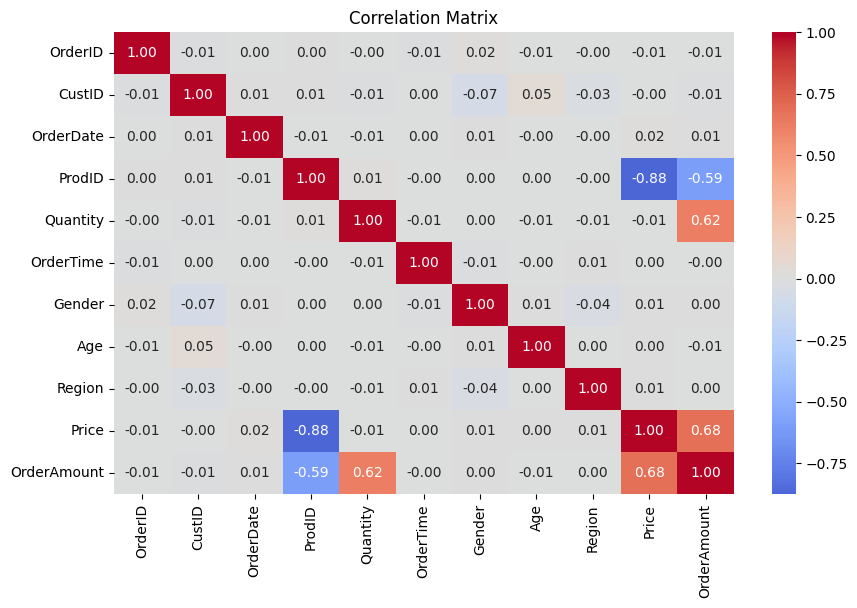

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(IntegOrders2.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

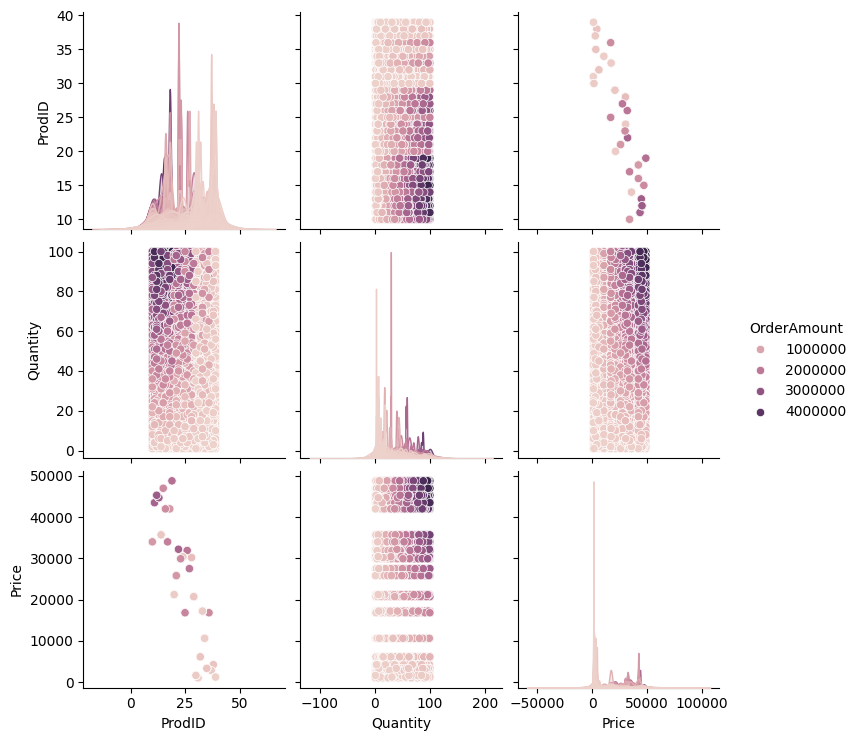

In [ ]:
IntegOrders3=IntegOrders2.copy()
IntegOrders3.drop(columns=['OrderID','CustID', 'OrderDate', 'OrderTime', 'Gender', 'Age', 'Region'], axis=1, inplace=True)
#sns.pairplot(IntegOrders3)
sns.pairplot(IntegOrders3, hue='OrderAmount')